# **Step 5: Import Data**

In [2]:
import pandas as pd

# Load the dataset with low_memory=False
file_path = r"C:\Users\Asus\Music\CitiBike_2022_Data\merged_citibike_weather.csv"
df = pd.read_csv(file_path, low_memory=False)

# Display first 5 rows
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,STATION,DATE,PRCP,TMAX,TMIN
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,USW00094728,2022-01-21,0.0,-55.0,-99.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,USW00094728,2022-01-10,0.0,44.0,-43.0
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,USW00094728,2022-01-26,0.0,-21.0,-66.0
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,USW00094728,2022-01-03,0.0,28.0,-55.0
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,USW00094728,2022-01-22,0.0,-16.0,-105.0


# **Step 6: Plotly Bar Chart – Most Popular Stations**

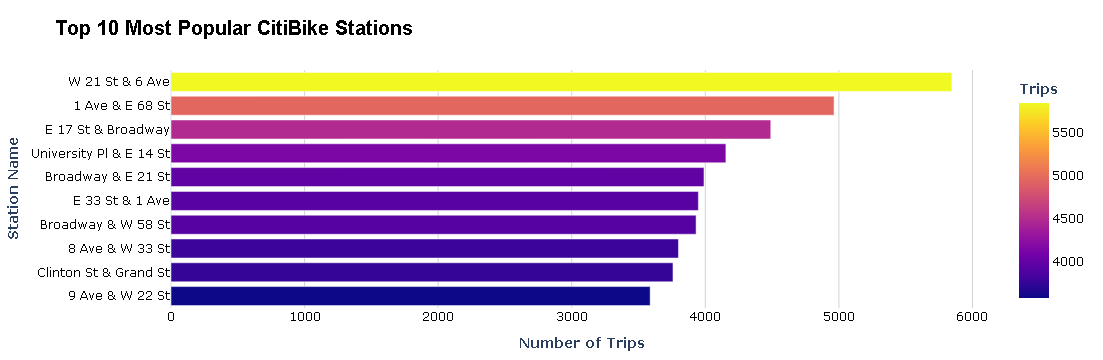

In [6]:
import plotly.express as px
import plotly.io as pio

# Set a default template with better visibility
pio.templates.default = "plotly_white"  # Use "plotly_dark" for dark themes

# Count the number of rides from each start station
popular_stations = df['start_station_name'].value_counts().head(10)

# Convert to DataFrame
stations_df = popular_stations.reset_index()
stations_df.columns = ['start_station_name', 'count']

# Sort data in ascending order for a clean horizontal bar chart
stations_df = stations_df.sort_values(by="count", ascending=True)  

# Create a horizontal bar chart with visually appealing colors
fig = px.bar(
    stations_df,
    x="count",
    y="start_station_name",
    orientation="h",  # Horizontal for better readability
    title="<b>Top 10 Most Popular CitiBike Stations</b>",
    labels={"start_station_name": "<b>Station Name</b>", "count": "<b>Number of Trips</b>"},
    color="count",
    color_continuous_scale="Plasma",  # A high-contrast and professional color scale
)

# Improve layout styling for clarity
fig.update_layout(
    title_font=dict(size=20, family="Arial", color="black"),  # Dark color for visibility
    xaxis=dict(
        title="<b>Number of Trips</b>", 
        tickfont=dict(size=12, color="black"),  
        gridcolor="lightgrey"
    ),
    yaxis=dict(
        title="<b>Station Name</b>", 
        tickfont=dict(size=12, color="black")
    ),
    coloraxis_colorbar=dict(
        title="<b>Trips</b>", 
        tickfont=dict(color="black")
    ),
    plot_bgcolor="white",  # White background for best visibility
    paper_bgcolor="white",  
    margin=dict(l=150, r=50, t=70, b=50),  # Adjusted margins for clean spacing
)

# Show the updated chart
fig.show()

# **Step 8: Create a Streamlit App**